<font color="">**Introduction to PyTorch**</font>

<font color="">**James Watt School of Engeering - University of Glasgow**</font>

<font color="">**Linear Regression Models**</font>

<font color="DeepSkyBlue">**Lecturer**</font>: **Khiem Nguyen**

# Linear Regression

Linear regression is a model that estimates the linear relationship between a scalar response (dependent variable) and one or more explantory variables (independent variables). A model with exactly one independent variable is a **simple linear regression**; a model with more than one independent variables is a **multiple linear regression**. Linear regression is a type of machine learning algorithm in supervised learning, that learns from the labelled datasets and maps the data points to the most optimized linear functions that can be used for prediction on new datasets.

## Terminology and remark
Given a dataset $\mathrm{D} = \{(\mathbf{x}^{(1)}, y^{(1)}), \ldots (\mathbf{x}^{m}, y^{m})\}$ in which $\mathbf{x}^{(i)} = (x_{1}^{(i)}, \ldots x_{n}^{(i)})$ is one particular independent variable and $y^{(i)}$ is its corresponding dependent variable, a linear regression model assumes that the relationship between the independent variable $\mathbf{x}$ and the dependent variable $y$. In machine learning, one data point $(\mathbf{x}^{(i)}, y^{(i)})$ is called one example or one sample. The independent variable data point $\mathbf{x}^{(i)}$ is an input variable, and $y^{(i)}$ is the corresponding label. The components of $\mathbf{x}$, namely $x_1, x_2, \ldots x_n$ are called features. Therefore, the dataset $\mathrm{D}$ has $m$ examples, and $n$ features.

In machine learing procedure, we normally split a data set into two or three smaller datasets
- Training dataset: The data are used for establishing the prediction model
- Validation dataset: The data are used to measure how well the model has been trained and to decide whether futher training is needed.
- Test dataset: The data are used to justify how well the model performs on the unseen data.

Note that we don't have to necessarily split a dataset into three datasets as mentioned. If the traininng process is fast and we know the model can be trained very efficiently, we can split the original dataset into only two smaller subsets, namely training set and test set.

## Formulation

### Linear regression model
A linear regression model for a problem with $n$ features takes the form
$$
f_{\mathbf{w}, b}(\mathbf{x}) = f(\mathbf{x}; \mathbf{w}, b) = \sum\limits_{j=1}^{n} w_j x_j + b = \mathbf{w} \cdot \mathbf{x} + b = w_1 x_1 + \cdots + w_n x_n + b
$$
where $\mathbf{w} = (w_1, \ldots, w_n)$ is the weight vector and $b$ is the bias (intercept) of the model. The dot between $\mathbf{w}$ and $\mathbf{x}$ denote the dot product between two vectors. If we define $x_0 = 1$ and $w_0 = b$, we can rewrite the above model expression as
$$
f(\mathbf{x}; \mathbf{w}, b) = \sum\limits_{j=0}^{n} w_j x_j = w_0 x_0 + \cdots + w_n x_n
$$
The weights $w_j$ for $j = 1, \ldots, n$ and the bias $b$ are called **model parameters**. We will see that all the parameters in a machine learning model, regardless how simple or how complex the model is, are defined as model parameters in machine learning framework PyTorch too.

Our goald is to find the values of $\mathbf{w}$ and $b$ so that the model can make the prediction on the given dataset as well as possible. To this end, we define the loss function that measure the mean square error between the prediction and the true labels on the training dataset. As the formula would not change if we use the training set or the entire original dataset, let us use the original dataset for the formulation. The loss function reads
$$
\mathcal{L}(\mathbf{w}, b) = \frac{1}{2 m}\sum\limits_{i=1}^{m} (f(\mathbf{x}^{(i)}; \mathbf{w}, b) - y^{(i)})^2
$$
By trying to obtain the prediction as well as possible, we seek the parameters $\mathbf{w}$ and $b$ to minimize the loss function $L(\mathbf{w}, b)$
$$
\mathbf{w}^{\ast}, b^{\ast} = \mathrm{arg} \min\limits_{\mathbf{w}, b} L(\mathbf{w}, b).
$$
The above mathematical formula just means as follows: We minimize the loss function $L(\mathbf{w}, b)$ and the solution of this minimization process that makes the loss function achieves its minimum is denoted $\mathbf{w}^{\ast}, b^{\ast}$

**Remark**

In the lectures, I name the loss function presented here *cost function* and emphasize that it is also called loss function in literature as well. Since the practioners in PyTorch community and even the PyTorch tutorial call it the loss function, I decide to call it loss function here. This help you to transition smoothly and easily if you wish to read more online tutorial.

### Training a linear regression model
Training a linear regression model involves running a gradient-based method to minimize the cost function. We have learned the basics of gradient descent summarized according the formulation updating the parameters $\mathbf{w}$ and $b$ as follows
$$
\begin{aligned}
\mathbf{w} &\quad\longleftarrow& \mathbf{w} - \alpha \frac{\partial L}{\partial \mathbf{w}}\\[8pt]
b &\quad\longleftarrow& b - \alpha \frac{\partial L}{\partial b}
\end{aligned}
$$
Computing the derivatives of the loss function with respect to the model parameters (namely, the gradient of the loss function) is the most complex process in this formulation. We will see that this computation out to be extremely easy in PyTorch thank to the `autograd` engine we learned in the last Notebook, and therefor the implementation is straightforward in PyTorch. Moreover, we see that the naive gradient descent presented above is just one of the many ways to minimize the loss function. Indeed, PyTorch provides optimization tools with various algorithms which are more efficient than the naive gradient descent method.

## Linear regression with naive gradient descent

Let us try to implement a linear regression model using the naive gradient descent we learned in the lectures by using PyTorch. You will see that it is surprising easy. For this purpose, we will generate a dataset that is obtained by using random generator and the exact linear mapping
$$
y = \sum\limits_{j=1}^{n} w_j x_j + b
$$
Moreover, we do not add noise to the data. Therefore, the loss function can achieve the zero minimum in theory because the linear regression model, if trained perferctly, can make perfect prediction on the dataset:
$$\min\limits_{\mathbf{w}, b} L(\mathbf{w}, b) =0 $$

First, let us generate the data set with $11$ features. For illustration, we use the following linear mapping for data generation
$$
f(\mathbf{x}) = \bigg(\sum\limits_{j=-5}^{5} j \, x_j\bigg) + \frac{5}{2} = \mathbf{w}^{\text{ref}} \cdot \mathbf{x} + b^{\text{ref}},
$$
where the dot 
So, the reference (exact) parameters for the underlying linear model are
$$
w_j^{\text{ref}} = j\quad \forall j = -5, \ldots, 5, \qquad b^{\text{ref}} = \frac{5}{2}
$$

In [34]:
# First thing first
import torch
import numpy as np
import matplotlib.pyplot as plt

In [35]:
torch.Generator().manual_seed(42)
n_samples, n_features = 2000, 11
w_ref = torch.linspace(-5, 5, 11, requires_grad=False)
b_ref = torch.tensor([2.5], requires_grad=False)
X_data = torch.rand(size=(n_samples, n_features))
y_data = X_data.matmul(w_ref) + b_ref
print(f"x_data.shape = {X_data.shape}")
print(f"y_data.shape = {y_data.shape}")
print(f"w_ref.shape = {w_ref.shape}")
print(f"b_ref.shape = {b_ref.shape}")

x_data.shape = torch.Size([2000, 11])
y_data.shape = torch.Size([2000])
w_ref.shape = torch.Size([11])
b_ref.shape = torch.Size([1])


We define the model parameters as two tensors `w` and `b` with the attribute `require_grad=True`. Tensor `w` is just a one-dimensional vector with $n = 11$ components and $b$ is another one-dimensional vector with just one element (a tensor with one scalar). We need to set the keyword argument `requires_grad=True` because we want to compute the derivative of the loss function with respect to these variables, which will be stored in `w.grad` and `b.grad`.

Since the input data is defined as a $m\times n$ 2-dimensional tensor, denoted as $\mathbf{X}$, the model make the prediction by just a simple forward pass following the computation
$$
f(\mathbf{X}; \mathbf{w}, b) = \mathbf{X} \mathbf{w} + b
$$
with $\mathbf{X} \mathbf{w}$ denoting the matrix multiplication between two tensors. This point can be a bit confusing because $\mathbf{w}$ in our code is just a 1-dimensional vector. PyTorch handles it as we would expect: It performs the dot product of between last dimension of $\mathbf{X}$ and the first dimension of $\mathbf{w}$. The outcome is a 1-dimensional vector. Therefore, it is equivalent to "multiplying $\mathbf{X}$ by the column vector constructed from $\mathbf{w}$ and then flattening the resulted column vector into the 1-dimensional vector."

In [36]:
# Let us illustrate the above point by a simple code.
X = torch.ones(size=(4, 3), requires_grad=False)
w = torch.ones(3, requires_grad=False)
w_column = w.reshape((-1, 1))
Xw = X.matmul(w)
Xw_column = X.matmul(w_column)
print(f"Xw = {Xw}")
print(f"Xw_column=\n{Xw_column}")

Xw = tensor([3., 3., 3., 3.])
Xw_column=
tensor([[3.],
        [3.],
        [3.],
        [3.]])


**Forward pass** and **backward pass**

Before running the gradient descent, let us now compute the loss function (forward propagation) and its gradient (backward propagation), namely $\partial L / \partial w_j$ and $\partial L / \partial b$ for just one iteration step. Note that sometimes people refer to forward pass as the step of computing the output of the model given the input data. However, I think it is only fair to refer to forward as a complete step of computing the loss function because the backward propagation corresponds to the compute the gradient of the loss function, namely the derivative of the loss function with respect to the model parameters, not the derivatives of the model function with respect to its parameters. In any case, you should understand that the backward pass can be very flexible and can be performed anytime and anywhere you need. 

**Remark**: We particularly do this boring step to convince you that the formulation we learned in the theory is correct.

In [37]:
# We just create model parameters with all unit values so that it is easy
# to double-check the theory later.
w = torch.ones(n_features, requires_grad=True)      
b = torch.ones(1, requires_grad=True)

# Forward pass
y_pred = X_data.matmul(w) + b
loss = 1 / (2 * n_samples) * torch.sum((y_pred - y_data) ** 2)


# Backward pass
loss.backward()     # That's it... nothing more
# Let us look at the gradient of the loss function
print(f"w.grad = {w.grad}")
print(f"b.grad = {b.grad}")

w.grad = tensor([2.4881, 2.3081, 2.2685, 2.2163, 2.0926, 2.0538, 1.9590, 1.8132, 1.8148,
        1.6770, 1.6450])
b.grad = tensor([3.9198])


On the other hand, we know from the lectures that the gradient of the loss function $L$ can be computed following
$$
\begin{aligned}
\frac{\partial L}{\partial w_j} &= \frac{1}{n} \sum\limits_{i} (f^{\mathbf{x}^{(i)}} - y^{(i)}) x_j^{(i)} \\[12pt]
\frac{\partial L}{\partial b} &= \frac{1}{n}  \sum\limits_{i} (f^{\mathbf{x}^{(i)}} - y^{(i)})
\end{aligned}
$$
Let us verify whether this is true. You will see that apart from the round-off errors accumulated through the backprogation calculation, the numerical results given by PyTorch agrees with the theory we learned.

In [38]:
dL_dw = (y_pred - y_data).matmul(X_data) / n_samples
dL_db = (y_pred - y_data).sum() / n_samples
print(f"dL_dw = {dL_dw}")                       # It is identical to w.grad up to the digits shown on the console.
print(f"dL_db = {dL_db}")

print(f"dL_dw - w.grad = {dL_dw - w.grad}")     # The differences should be very small. But they are not identical to zero.
print(f"dL_db - b.grad = {dL_db - b.grad}")

dL_dw = tensor([2.4881, 2.3081, 2.2685, 2.2163, 2.0926, 2.0538, 1.9590, 1.8132, 1.8148,
        1.6770, 1.6450], grad_fn=<DivBackward0>)
dL_db = 3.919809103012085
dL_dw - w.grad = tensor([-4.7684e-07, -4.7684e-07, -2.3842e-07, -2.3842e-07,  2.3842e-07,
         0.0000e+00,  2.3842e-07, -2.3842e-07,  2.3842e-07, -2.3842e-07,
        -1.1921e-07], grad_fn=<SubBackward0>)
dL_db - b.grad = tensor([-2.3842e-07], grad_fn=<SubBackward0>)


**Training linear regression model**

We have learned how to make one forward pass and one backward pass. Let us put them all together in a training loop using the naive gradient descent. The number of epochs and the learning rate are defined in the code cell.

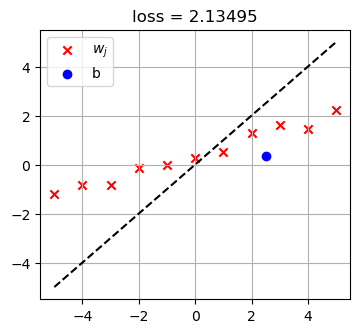

In [39]:
# We seet the seed for random generator for reproducibility purpose.
# It means that if we run this code cell again and again, the same result
# will be achieved although we have defined w and b using torch.rand(...)
torch.manual_seed(seed=42)  
w = torch.rand(n_features, requires_grad=True)
b = torch.rand(1, requires_grad=True)

epochs = 500
lr = 0.01
for epoch in range(epochs):
    # Compute the prediction of the model --> forward pass
    y_pred = X_data.matmul(w) + b

    # Compute the cost function using Mean Squared Error metric.
    loss = 0.5 / n_samples * (y_pred - y_data).pow(2).sum()
    
    # Backward pass
    loss.backward()

    # Update parameters according to the gradient descent
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        
        # We zero out the gradient before the next update. 
        # Otherwise, the gradients for each iteration will be 
        # accumulated into w.grad and b.grad
        w.grad.zero_(), b.grad.zero_()

# Plot the w-reference and w from the model on the same plot.
# The perfect training would mean w-reference and w must align
# on the same diagonal line w = w_ref.
plt.figure(figsize=(4, 3.5))
plt.scatter(w_ref.detach(), w.detach(), marker='x', color='r', label='$w_j$')
plt.scatter(b_ref.detach(), b.detach(), marker='o', color='b', label='b')
plt.plot([-5, 5], [-5, 5], 'k--')
plt.title(f"loss = {loss.item():6.5f}")
plt.legend()
plt.grid(True); plt.show()

We can see that the training does not give good result enough. Indeed, the model parameters $(\mathbf{w}, b)$ are still quite far off from the reference paramters $(\mathbf{w}^{\text{ref}}, b^{\text{ref}})$. The problem is that the training process: we have not trained with enough epochs, and the learning rate is still not optimal. Let us try improve the model by using different number of epochs and learning rate. To this end, let us put everything in a function governed by the number of epochs and the learning rate, and run the functions with various input values. You will see, the results are much better if we choose the right learning rate $\alpha$, even if we use fewer number of training epochs.

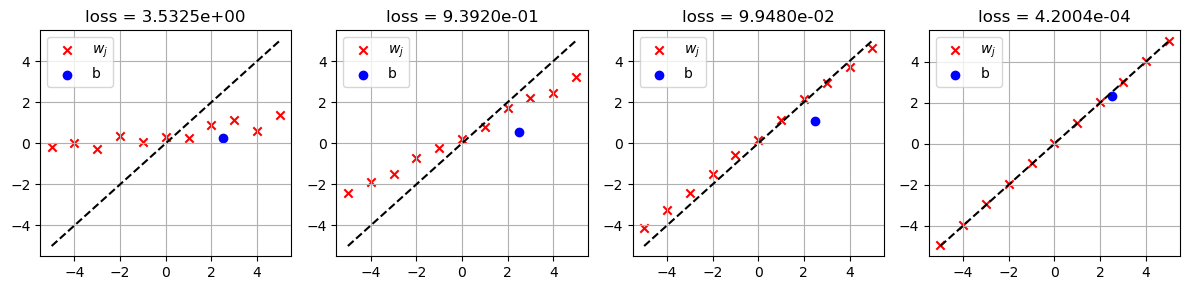

In [40]:
def execute_gradient_descent(epochs, lr):
    torch.manual_seed(seed=42)
    w = torch.rand(n_features, requires_grad=True)
    b = torch.rand(1, requires_grad=True)
    for epoch in range(epochs):
        y_pred = X_data.matmul(w) + b
        loss = 0.5 / n_samples * (y_pred - y_data).pow(2).sum()
        
        loss.backward()
        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad
            w.grad.zero_(), b.grad.zero_()

    return w, b, loss

ep_list = [200, 200, 250, 250]
lr_list = [0.01, 0.05, 0.1, 0.5]

plt.figure(figsize=(12, 3))
torch.manual_seed(seed=42)      # just for reproducibility
for i in range(len(ep_list)):
    w, b, loss = execute_gradient_descent(epochs=ep_list[i], lr=lr_list[i])
    plt.subplot(1, 4, i+1)
    plt.scatter(w_ref.detach(), w.detach(), marker='x', color='r', label='$w_j$')
    plt.scatter(b_ref.detach(), b.detach(), marker='o', color='b', label='b')
    plt.plot([-5, 5], [-5, 5], 'k--')
    plt.title(f"loss = {loss.item():5.4e}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()

## Linear regression with object-oriented programming

The above implementation is fine. But when we want to build a more complex machine learning models such as deep neural networks, convolution neural networks and recurrent neural networks, the naive implementation will suffer. On one hand, we must write lengthy code to implement the complex mathematical operations in a deep neural network. On another hand, we cannot use take advatange of the standard building block of neural networks and cannot automate the optimization process by using different algorithms. In this section, we will explore an object-oriented approach to build a linear regression model using various modules and submodules in PyTorch. 

When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning. In TensorFlow, packages like Keras, TensorFlow-Slim, and TFLearn provide higher-level abstractions over raw computational graphs that are useful for building neural networks. In PyTorch, the `nn` package serves this same purpose. The `nn` package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The `nn` package also defines a set of useful loss functions that are commonly used when training neural networks.

**Key components to learn**

It is quite clear at this point that we can decouple the optimization algorithm from the step of definining a model presentation. By defining a model representation, we are building a neural network. Even a simple linear regresion model can be considered as a neural network (shallower than a shallow neural network). This model receives the input data and make the prediction appropriately using the complex mathematical function under the skin of the model. To train the model, we need to seek for the learnable parameters in the model, we must perform an optimization process to minimize a meaningful loss function reflecting the aims of the problems such as regression prediction or category prediction. The optimization process can be done for any optimization problem, or any multi-variable function, and is not necessarily for just machine learning problem. For this reason, we can think of the optimization process as an separate identity. As long as we can define the function to be minimized, we can call an optimizer to do the job on that function. In our case, we want to define appropriate loss function for a particular problem. The job of the the optimizer is try to minimize such loss function regardless how it may be defined.

With the above explanation, we can roughly conclude building and training a machine learning model consists of three key components (put in the context of PyTorch):
- Define a machine learning model as a subclass of the class `torch.nn.Module`
- Define a loss function and an optimizer provided in the submodule `torch.nn` and `torch.optim`, respectively.
- Train the machine learning model.

Don't worry! We will build more and more complex networks and learn a lot more building blocks in the future. Let us focus on these three components and illustrate them via the task of building and training a multiple linear regression model for now.

In [41]:
# First thing first, we import something useful
import torch.functional as F
import torch.nn as nn

### Building a model subclassing `nn.Module`

Except for `Parameter`, the classes we discuss in section are all subclasses of `torch.nn.Module`. This is the PyTorch base class meant to encapsulate behaviors specific to PyTorch Models and their components. One important behavior of `torch.nn.Module` is registering parameters. If a particular `Module` subclass has learning weights, these weights
are expressed as instances of `torch.nn.Parameter`. The `Parameter` class is a subclass of `torch.Tensor`, with the special behavior that when they are assigned as attributes of a `Module`, they are added to the list of that modules parameters. These parameters may be accessed through the `parameters()` method on the `Module` class.

In [42]:
class LinearRegression(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(in_features=n_features, out_features=1, bias=True)

    def forward(self, x):
        x = self.fc(x)
        x = x.flatten()
        return x

This shows the fundamental structure of a PyTorch model: there is an `__init__()` method that defines the layers and other components of a model, and a `forward()` method where the computation gets done. Note that we can print the model, or any of its submodules, to learn about its structure.

In [43]:
model = LinearRegression()
print(f"Model:\n{model}\n")
print(f"Fully connected layer: {model.fc}\n")
print(f"Weight of the linear layer:\n{model.fc.weight}\n")
print(f"Bias of the linear layer:\n{model.fc.bias}")

Model:
LinearRegression(
  (fc): Linear(in_features=11, out_features=1, bias=True)
)

Fully connected layer: Linear(in_features=11, out_features=1, bias=True)

Weight of the linear layer:
Parameter containing:
tensor([[ 0.2228,  0.0408,  0.1454, -0.0426,  0.2324,  0.0446, -0.1408,  0.0769,
         -0.1389, -0.0354, -0.1225]], requires_grad=True)

Bias of the linear layer:
Parameter containing:
tensor([0.2000], requires_grad=True)


In [44]:
# from torchviz import make_dot, make_dot_from_trace

# x = torch.randn(size=(1, n_features))
# make_dot(model(x), params=dict(model.named_parameters()))

As mentioned above, by subclassing the class `nn.Module` and using `nn.Linear()`, our model automatically recognizes all the _learnable parameters_ in the Linear layer. These learnable parameters are stored in the generator object `Module.parameters` accessed by using the method `model.parameters()`. To see how the parameters look like, we must go through the generator object by a for loop. The generator object behaves like an *iterable object*.

In [45]:
print(f"Model parameters:\n{model.parameters()}\n")
parameter_list = [p for p in model.parameters()]
print(f"All parameters in the model:\n{parameter_list}")

Model parameters:
<generator object Module.parameters at 0x0000022C07101FC0>

All parameters in the model:
[Parameter containing:
tensor([[ 0.2228,  0.0408,  0.1454, -0.0426,  0.2324,  0.0446, -0.1408,  0.0769,
         -0.1389, -0.0354, -0.1225]], requires_grad=True), Parameter containing:
tensor([0.2000], requires_grad=True)]


### Define optimizer and loss function

The package `torch.optim` gives us a lot of useful optimizers to train machine learning models. Most commonly used methods are already supported, and the interface is general enough, so that more sophisticated ones can also be easily integrated in the future.


**How to use an optimizer**
To use torch.optim you have to construct an optimizer object that will hold the current state and will update the parameters based on the computed gradients.

**Construct an optimizer**
To construct an Optimizer you have to give it an iterable containing the parameters (all should be Variable s) to optimize. Then, you can specify optimizer-specific options such as the learning rate, weight decay, etc. Here are two examples
```python
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)    # SGD --> Stochastic Gradient Descent
optimizer = optim.Adam([var1, var2], lr=0.0001)
```

There are a ton of things to discuss in the package `torch.optim`. For interested reader, please refer to [documentation](https://pytorch.org/docs/stable/optim.html)

For our linear regression model, we shall use the *Adam* optimizer and define the loss function using the mean squared error.

In [46]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.25)
criterion = nn.MSELoss()
# Let us have a look at we have just defined.
print(f"optimizer = {optimizer}")
print(f"criterion = {criterion}")

optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.25
    maximize: False
    weight_decay: 0
)
criterion = MSELoss()


In [47]:
# Let us try to use the function criterion
a = torch.arange(10)
b = torch.linspace(0, 5, 10)
mse = 1 / (a.shape[0]) * (a - b).pow(2).sum()

mse_nn = criterion(a, b)
print(f"mse    = {mse}")
print(f"mse_nn = {mse_nn}")
print(f"mse == mse_nn: {mse == mse_nn}")    # They are equal

mse    = 5.629629135131836
mse_nn = 5.629629135131836
mse == mse_nn: True


### Train the model

With everything explained above, this step is natural and the code provided below is self-explanatory. Essentially, we make some small replacements:
- The step of updating the learnable parameters in the model is done by the statement `optimizer.step()`
- The step of zeroing out the `grad` attributes in the model parameters is done by the statement `optimizer.zero_grad()`

If you can compare the training loop before using the optimizer and after using the optimizer, the code appears quite natural. However, to understand the code better, it is important to recall the we have registered the learnable parameters in the model to the optimizer via the statement
```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.25)
```
Therefore, although we do not explicitly mention the parameters in the model in `optimizer.step()` and `optimizer.zero_grad()`, the optimizer understand those parameters and act on them.

In [48]:
epochs = 1000       # we set learning rate before in the optimizer
for epoch in range(epochs):

    y_pred = model(X_data)
    loss = criterion(y_data, y_pred)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

model.fc.weight =
Parameter containing:
tensor([[-5.0000e+00, -4.0000e+00, -3.0000e+00, -2.0000e+00, -1.0000e+00,
         -6.5976e-08,  1.0000e+00,  2.0000e+00,  3.0000e+00,  4.0000e+00,
          5.0000e+00]], requires_grad=True)
model.fc.bias =
Parameter containing:
tensor([2.5000], requires_grad=True)


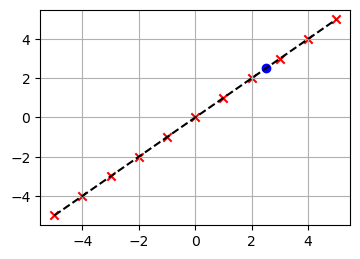

In [49]:
# Let us look at the numerical results.
print(f"model.fc.weight =\n{model.fc.weight}")
print(f"model.fc.bias =\n{model.fc.bias}")

# The results look very good. We can plot them now.
plt.figure(figsize=(4, 2.8))
plt.scatter(model.fc.weight.detach(), w_ref, marker='x', color='r')
plt.scatter(model.fc.bias.detach(), b_ref, marker='o', color='b')
plt.plot([-5, 5], [-5, 5], 'k--')
plt.grid(True); plt.show()

## Polynomial Regression

Polynomial regression can be derived from linear regression with polynomial features. Assume that we are given the dataset $\mathrm{D} = \{(x^{(i)}, y^{(i)})\}_{i=1}^{m}$, where $x^{(i)}$ is scalar. Then, the polynomial regression for one-dimensional input feature is expressed as
$$
P(x) = w_0 + w_1 x + \cdots w_n x^{n} = w_0 + \sum\limits_{j=1}^{n} w_j x^{j}
$$
By defining the new features $x_j = x^{j}$ for all $j = 1, \ldots, n$, the polynomial expression $P = P(x)$ can be cast to the linear regression model with $n$ features as we learned. That's it for the theory. As simple as that $\ldots$ 

**Problem description**

Again, we shall generate a dataset following a given one-dimensional function as follows
$$
f(x) = \exp(\sin(x)) \quad \forall x \in [-\pi, \pi]
$$
We shall build a polynomial regression with a user-defined polynomial degree.

**Discussion**

If we try to train a linear regression model on the polynomial features as we have just done above, we will run into a problem of slow convergence of the gradient-based optimization method. The reason, as explained in our lectures, is that the values of polynomial features run in very different ranges. For example, if $x$ runs from $-\pi$ to $\pi$, $x^2$ runs from $0$ to $\pi^2$, $x^{3}$ runs from $-\pi^3$ to $\pi^3$, and so on for higher powers $x^{j}$. For the gradient-based method to converge, we must choose a very small learning rate, which leads to the overall slow convergence of the optimization process. Therefore, we need to perform the feature scaling before we train the linear regression model on polynomial features. **Remark**:
As we have learned how to implement a polynomial regression in scikit-learn, the code below needs no detailed explanation and is self-explanatory.

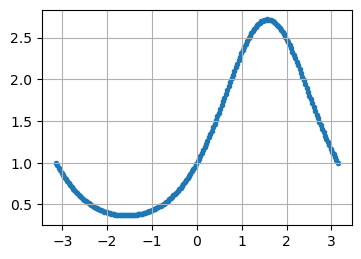

In [50]:
# Generate data using the 1-dimensiona function f(x) = exp(sin(x)) 
x = torch.linspace(-torch.pi, torch.pi, 200)
y = torch.exp(torch.sin(x))
plt.figure(figsize=(4, 2.8))
plt.scatter(x, y, marker='.')
plt.grid(True); plt.show()

In [51]:
degree = 10      # user-defined degree
X = torch.vstack([x**i for i in range(1, degree+1)]).T  # create polynomial features

std_X, mean_X = torch.std_mean(X, dim=0)                # compute the standard deviation and mean for all the features
X_scaled = (X - mean_X) / std_X                           # perform feature scaling

print(f"X.shape      = {X.shape}")
print(f"std_X.shape  = {std_X.shape}")
print(f"mean_X.shape = {mean_X.shape}")
print(f"X_norm.shape = {X_scaled.shape}")

X.shape      = torch.Size([200, 10])
std_X.shape  = torch.Size([10])
mean_X.shape = torch.Size([10])
X_norm.shape = torch.Size([200, 10])


In [ ]:
class PolynomialRegression(nn.Module):

    def __init__(self, degree):     # degree is the input argument for constructor
        super().__init__()
        self.degree = degree
        self.fc = nn.Linear(in_features=self.degree, out_features=1, bias=True)

    def forward(self, x):
        x = self.fc(x)
        return x.flatten()

torch.manual_seed(seed=42)
model = PolynomialRegression(degree)

In [53]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.15)
criterion = nn.MSELoss()

epochs = int(1e4)
print_stamp = epochs//10
for epoch in range(epochs):

    y_pred = model(X_scaled)
    loss = criterion(y, y_pred)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if epoch % print_stamp == print_stamp - 1:
        print(f"epoch {epoch}: loss = {loss.item()}")

epoch 999: loss = 0.0011846352135762572
epoch 1999: loss = 0.0003217666526325047
epoch 2999: loss = 0.00026781621272675693
epoch 3999: loss = 0.0007317078998312354
epoch 4999: loss = 0.00028622878016903996
epoch 5999: loss = 0.00019917290774174035
epoch 6999: loss = 0.0001786107022780925
epoch 7999: loss = 0.00016384597984142601
epoch 8999: loss = 0.0001500715734437108
epoch 9999: loss = 0.00013878068421036005


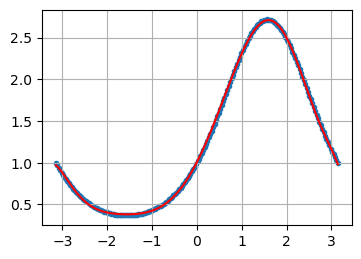

In [54]:
plt.figure(figsize=(4, 2.8))
plt.scatter(x, y, marker='.')
plt.plot(x, model(X_scaled).detach(), 'r-')
plt.grid(True); plt.show()

Let us compare the polynomial regression model obtained by using PyTorch and the counterpart obtained by using scikit-learn.

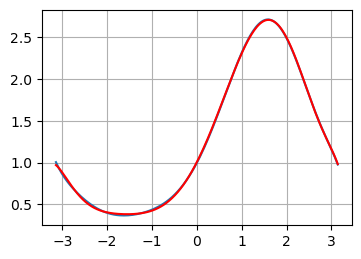

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

linear_regression = LinearRegression()
X_np = x.numpy().reshape((-1, 1))
y_np = y.numpy()
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_np)
# There is no need to perform feature scaling because the 
# linear Regression from sklearn is trained very 
# efficiently using a high-order gradient-based method.
linear_regression.fit(X_poly, y_np)     
plt.figure(figsize=(4, 2.8))
plt.plot(x, linear_regression.predict(X_poly))
plt.plot(x, model(X_scaled).detach(), 'r-')
plt.grid(True); plt.show()

## Customized model

It is of course desirable to build a customized model that represents any complex mathematical model. This example revisits the one of the tasks given in the Exercise Assignment \#1. Let us repeat the question of the task.

You are given a dataset generated by using the following Python function. In addition to this data, the hidden function generating such data is revealed. Our task is to build a regression model that mimics the hidden function and that is governed by a set of model (learnable) parameters. First, we need to define an approproriate loss function and implement a gradient descent method to find the learnable parameters defining the regression model. This task will be solved by using PyTorch.

**Remark**&nbsp; The code is quite self-explanationatory and needs litte explanation.

In [ ]:
# This is the function given in the exercise.

x_range = 3
def generate_data(student_id, level, size):
    np.random.seed(student_id)      # use your student id
    x_uniform = np.linspace(0, x_range, size)
    x_noise = np.random.normal(loc=0, scale=0.0, size=size)
    x_data = x_uniform + 0 * x_noise
    def hidden_func(x):
        return 2 / np.exp(4 * (x - x_range/2)**2) + 2
    y_exact = hidden_func(x_data)
    y_noise_add = level * (2*np.random.random(size) - 1)
    y_noise_mult = np.random.normal(loc=1, scale=0.005, size=size)
    y_data = y_exact * y_noise_mult + y_noise_add
    
    data = np.vstack((x_data, y_data)).T
    return data, hidden_func

# We generate the dataset defined in NumPy
data, hidden_func = generate_data(student_id=42, level=0.1, size=200)
# We convert data in NumPy format to the data in PyTorch.
# note that we must convert the data to np.float32. Otherwse, the tensor x will
# have the data type as torch.float64 which is double. However, since the Parameters
# we define below has the data type torch.float32 which is float by default, the 
# computation of backward pass will issue an error saying that data types are not
# consistent.
x = torch.from_numpy(data[:,0].astype(np.float32))       
y = torch.from_numpy(data[:,1].astype(np.float32))

Note that in the constructor `__init__()` of the class `CustomModel`, we signify `self.a`, `self.b`, `self.c` and `self.d` as the learnable parameters of the model by employing the signature `torch.nn.Paramter(...)`. If we just write
```python
self.a = torch.rand()
self.b = torch.rand()
self.c = torch.rand()
self.d = torch.rand()
```
they will be considered just standard members of the class `CustomModel` but not learnable parameters of the model. By writing
 ```python
self.a = torch.nn.Parameter(torch.rand(()))
self.b = torch.nn.Parameter(torch.rand(()))
self.c = torch.nn.Parameter(torch.rand(()))
self.r = torch.nn.Parameter(torch.rand(()))
```
we tell `CustomModel` that they must be treated as learnable parameters of the model. To illustrate this point, I just define a member variable `self.junk` in the constructor and examine the list of learnable parameters by using the method `.parameters()`.

In [57]:
class CustomModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.rand(()))
        self.b = torch.nn.Parameter(torch.rand(()))
        self.c = torch.nn.Parameter(torch.rand(()))
        self.r = torch.nn.Parameter(torch.rand(()))
        self.junk = torch.rand(())      # you won't see this in the list of learnable parameters

    def forward(self, x):
        x = self.a / torch.exp(self.b * (x - self.r)**2) + self.c
        return x
    
cmodel = CustomModel()
print([p for p in cmodel.parameters()])
print(f"cmodel.junk = {cmodel.junk}")   # but cmodel.junk exists.

[Parameter containing:
tensor(0.5936, requires_grad=True), Parameter containing:
tensor(0.8694, requires_grad=True), Parameter containing:
tensor(0.5677, requires_grad=True), Parameter containing:
tensor(0.7411, requires_grad=True)]
cmodel.junk = 0.42940449714660645


In [58]:
for i in cmodel.parameters():
    print(i)

Parameter containing:
tensor(0.5936, requires_grad=True)
Parameter containing:
tensor(0.8694, requires_grad=True)
Parameter containing:
tensor(0.5677, requires_grad=True)
Parameter containing:
tensor(0.7411, requires_grad=True)


We use the mean squared error loss `nn.MSELoss()` and train the model using Adam optimizer. Then, the function model is plotted on top of the data points.

In [59]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(cmodel.parameters(), lr=0.25)
epochs = int(5e3)
print_stamp = epochs//10
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = cmodel(x)
    loss = criterion(y, y_pred)
    loss.backward()
    optimizer.step()
    
    if epoch % print_stamp == print_stamp - 1:
        print(f"epoch {epoch}: loss = {loss.item():5.4e}")

epoch 499: loss = 3.6426e-03
epoch 999: loss = 3.6425e-03
epoch 1499: loss = 3.6425e-03
epoch 1999: loss = 3.6425e-03
epoch 2499: loss = 3.6427e-03
epoch 2999: loss = 3.6426e-03
epoch 3499: loss = 3.6426e-03
epoch 3999: loss = 3.6425e-03
epoch 4499: loss = 3.9572e-03
epoch 4999: loss = 6.7461e-03


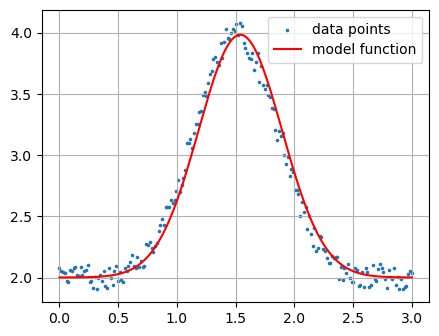

In [60]:
plt.figure(figsize=(5, 3.8))
plt.scatter(x, y, marker='.', s=10, label='data points')
plt.plot(x, cmodel(x).detach(), 'r-', label='model function')
plt.legend(); plt.grid(); plt.show()